# Intro to Python

## 0.0 Purpose of this lecture



There are two parts to this lab:

1) To expose you to the Python data analysis enviroment.

a) Gain experience writing simple programs using the Matplotlib module in Python

b) To develop skills in scientific plotting using Python.


2) Along the way we are going to discover some intereseting insights into elemental abundance in the solar system and the earth.

Through out this workshop there are three different activities that you will encounter.

1) **Example** code cells.  These will contain lines of code that demonstrate a type of analysis task.  You will need to run these as their **output** will be used by subsequent steps (i.e. by other cells) in the analysis.

2) **Action** which will be associated with blank cells that you need to write the correct code based off of text and example code that have been demonstrated to you.

3) **Questions** this final category are queries asking you to think about the scientific aspect of the data that you working with.  To answer these we will encourage you to **insert** a blank cell below the question and then type your text answer in the cell. You will need to set this cell to **Markdown** using the drop-down tool above.



## 0.5 Getting set up.

Now that you have run your first program lets get the notebook set up for your data analysis experiment.

Python is a open-source high-level programming language. It is also currently one of the most in demand tools in a wide range of industries, including environmental and geo resources organisation,  for data analysis, machine learning and artificial intelligence applications. Both of these facts mean that communities of researchers and engineers have developed a wide range of freely accessible tools which extend the basic functions of the base python language. All these additional tools mean that you as a user do not need to write 10's to 100's of lines of code to perform common actions like plotting, arranging data into nice human readable arrays / tables or figuring out how to import arbitrary data file formats.  A bundle of these tools is called a library.

For this lab we will be using two libraries extensively.  The first is called ```pandas```, which is a great tool for looking at data in a spreadsheet like manner. We will explore these functions below.  Additionally, whenever you have data, one of the main tasks a researcher will ask of the data is what does it look like like?  To do that ones needs plotting tool. While ```pandas``` has some built in plotting, this is built on another library, ```matplotlib```. With that in mind run the next cell to load these libraries by either pressing **shift + enter** simultaneously (fastest method) or pressing the big **run** button above.

### 0.5.1 Standard libaries for course
** Note** These next two code cells will need to be run before the start of every lecture and practical  

In [ ]:
%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sklearn as skl
import scipy as sci
import scipy.io as sio

#configure the plotting defaluts
plt.rcParams['figure.figsize'] = [15.256 , 6.024]
plt.rcParams['figure.dpi'] = 125 

### 0.5.2 Commands to connect to you local google drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/My Drive/2022_SFC_IDSP/datasets/'
results_path='/content/drive/My Drive/2022_SFC_IDSP/Week_2/'

Mounted at /content/drive/


**Note** if you want to disconnect your drive use this command

#### 0.5.3 Unmount a drive

In [ ]:
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.







## 1.0 Get some data!



1) the composition for the silicate earth is derived from Newsom 1995 (Global Earth Physics: A Handbook of Physical Constants), by averaging the first 5 columns of table 13.

2) the average CI composition comes from Lodders 2003(Astronomical Journal)

3) the D values or the partition coefficients come from https://link.springer.com/referenceworkentry/10.1007%2F1-4020-4496-8_110


To load the data using the pandas library's built in functions.  In this case can read (/import) in an excel file directly you will call the datafile in using the Pandas function ```read_excel```.

1) to call a function from a particular library you need to tell python what library we are using. From the cell above you can see that we imported the ``` pandas ``` libary as ``` pd ```. 

2) Then in python you can see what functions (think actions the software can take on an object) are available typing a '.' and then typing out the appropriate function. For example to load a spread sheet you will type:

```pd.read_excel('enter_the_file_name' )```

**note** Pandas also has built in functions for loading CSV, XML, HDF5 and other standard file formats. In classing coding speak to find out more check the help function or ''Read the Docs'' :-)


### 1.1 Aside on Variables 

The command above will load a file, but we want a way to refer to that **object** every time. Or to phase it another way, I want a shorthand method to writing ```pd.read_excel('enter_the_file_name' )``` that is more compact. As this named object is a bit of **data** we will refer to it as a **variable**. This describes the role that the data plays in the analysis, and the fact that we can change the data, as opposed to chaning the actions that will be done to the data. In programming there are many variables that one will encounter and create, but here we want to remember that it is just a name for a specific bit of data.

#### 1.1.1 Some nameing rules
**Variables** can be named anything you like subject to a few rules. 

1) In python they can not start with numbers or special characters/ symbols. 

2) Further good practice would dictate that you using something that is memorable, and specific.  Here I suggest using the name **'composition'** since we are going to load the composition of the solar system and the silicate earth.







### 1.2 Example 1 Load the data

**Example/ Getting started/ action 0**
By loading the data into 'composition', we can then type out the variable name and see what it looks like.  Since we have loaded the data using ```pandas``` (here abbreviated to ```pd``` by how we imported so you do not need to type out the full library every time). The data frame will look like an excel spreadsheet, but this called a **data frame**.  

The one task that you have to do here is type out the file name between the two ```''```. Jupyter makes this task particularly easy as there is an auto-complete function.  The data is most likely in the same directory as this notebook. So if you Type the first couple of letters of the file name you can then hit the ```Tab```key and then select the file name from the pop-up window. If you have placed the data in a different directory to the notebook, you will need to type out the file path (though the auto-complete function will help with this).

The file name is:  ```Siderophile_silicate_earth_chondrites_mean_IDSP.xlsx```

In [ ]:
composition = pd.read_excel(data_path+'Siderophile_silicate_earth_chondrites_mean_IDSP.xlsx')

To inspect an data object in Python one of the easiest ways is to simply type the name and see what it looks like.  We will often do this to see:

a) how we have modified the orignal data

b) what a sub-set of data looks like

It is not always required in an application, but when exploring data, and building a new analysis approach it is good to see what effects different actions have. 

Let's examine the data.

In [ ]:
composition

,atomic number,element,D value,D value temp,class of element,Earth Crust Mean,Earth Crust 1σ,Measurement units,Solar System Mean (ppm),Solar System 1σ
0,14.0,Si,4.800000e-03,met/sil (1600°C),Liphophile,21.782000,259.199228,%,106500.0000,1250.0000
1,23.0,V,5.600000e-01,met/sil (1600°C),Liphophile,91.220000,0.396074,ppm,55.7000,1.3000
2,24.0,Cr,3.500000e-01,met/sil (1600°C),Liphophile,2857.600000,0.321989,ppm,2590.0000,80.0000
3,25.0,Mn,2.000000e-02,met/sil (1600°C),Liphophile,1043.400000,3.544009,ppm,1910.0000,40.0000
4,73.0,Ta,9.700000e-04,met/sil (1600°C),Liphophile,36.650000,0.241247,ppb,0.0144,0.0001
5,15.0,P,1.700000e+02,met/sil (1600°C),Moderately siderophile,77.125000,0.550000,ppm,920.0000,100.0000
6,26.0,Fe,1.300000e+01,met/sil (1600°C),Moderately siderophile,6.250000,39.189795,%,182800.0000,1470.0000
7,27.0,Co,1.400000e+02,met/sil (1600°C),Moderately siderophile,104.200000,0.191964,ppm,502.0000,17.0000
8,28.0,Ni,1.300000e+03,met/sil (1600°C),Moderately siderophile,0.199180,16.622180,%,10640.0000,210.0000
9,31.0,Ga,3.400000e+01,met/sil (1600°C),Moderately siderophile,3.675000,0.003000,ppm,9.5100,0.3100


**Technical Comments** 

1) Immediately on loading the data into the data frame you should notice that this table of values looks very much like a spread sheet.

2) here we can now take actions on rows, columns and even generate new datasets / data frames

### 1.3 Some pandas commands

It you want to examine just the first 10 rows, use ```.head(n=10)``` where the n=10 gives the number of rows to display.

In [ ]:
composition.head(n=4)

,atomic number,element,D value,D value temp,class of element,Earth Crust Mean,Earth Crust 1σ,Measurement units,Solar System Mean (ppm),Solar System 1σ
0,14.0,Si,0.0048,met/sil (1600°C),Liphophile,21.782,259.199228,%,106500.0,1250.0
1,23.0,V,0.5600,met/sil (1600°C),Liphophile,91.220,0.396074,ppm,55.7,1.3
2,24.0,Cr,0.3500,met/sil (1600°C),Liphophile,2857.600,0.321989,ppm,2590.0,80.0
3,25.0,Mn,0.0200,met/sil (1600°C),Liphophile,1043.400,3.544009,ppm,1910.0,40.0


If you would like just get the names of all the columns use ```.columns```

In [ ]:
composition.columns

Index(['atomic number', 'element', 'D value', 'D value temp',
       'class of element', 'Earth Crust Mean', 'Earth Crust 1σ',
       'Measurement units', 'Solar System Mean (ppm)', 'Solar System  1σ'],
      dtype='object')

We will spend more time exploring differnt functions and tools for manipulating dataframes through out the course. This was just a taster.


## 2.0 Exploring and modifying dataframes.

Examining the **composition** dataframe you should notice the 'Silicate units' column.  This shows that the abundance of each element is recorded in units ranging from percent per kilogram (%) to parts per billion (ppb). Further, if you exmaine the abundance at the solar system level('Solar System Mean') you will observe that all the data is given in ppm.  So what we want to do is

1) create a new column in which we will place all the earth elemental abundances in ppm units.

2) filter through 



### 2.1 Filtering and changing data with the ```loc ``` function
We will now use the ```.loc``` function to locate the rows where there are elemental abundces for the silicate earth given in ppb.

**note** in python for a test of equality the ```==``` is used as a single  ```=``` is used to set variable or specific values.  Other logical tests are 

!= not equal

\> greater than

\< less than

<= less than or equal

\> greater than or equal

**Example** In the cell below is an example of using the ```loc``` function to find 'ppb' rows.

In [ ]:
composition['Measurement units']=='ppb'

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
Name: Measurement units, dtype: bool

In [ ]:
composition.loc[composition['Measurement units'] == 'ppb']


,atomic number,element,D value,D value temp,class of element,Earth Crust Mean,Earth Crust 1σ,Measurement units,Solar System Mean (ppm),Solar System 1σ
4,73.0,Ta,9.700000e-04,met/sil (1600°C),Liphophile,36.650000,0.241247,ppb,0.0144,0.0001
11,74.0,W,2.400000e+01,met/sil (1600°C),Moderately siderophile,20.366667,0.945270,ppb,0.0890,0.0070
12,46.0,Pd,5.600000e+05,met/sil (1300°C),Highly siderophile,4.450000,3.336998,ppb,0.5880,0.0200
13,77.0,Ir,8.000000e+10,met/sil (1300°C),Highly siderophile,3.070000,18.659946,ppb,0.4700,0.0050
14,79.0,Au,3.100000e+05,met/sil (1300°C),Highly siderophile,0.768500,6.392769,ppb,0.1460,0.0020


In the above example ```.loc```  was used to filter all the datafame and return only the rows where elements were measured in **ppb**.  Instead if you want only the **series** (the column of values) of elements which were measured at ppb concentrations you can instead **slice** the dataframe useing this syntax.

**Example**

In [ ]:
composition.loc[composition['Measurement units'] == 'ppb', 'element']

4     Ta
11     W
12    Pd
13    Ir
14    Au
Name: element, dtype: object

#### 2.1.1 Action 1 using ``` loc``` to filter a dataframe

Use ```loc``` to find elements given in % abundance.

#### 2.1.2 Example convert selected values
We need to rescale all the silicate earth values so that they are in the same units for comparison. We will do this by creating a new column and putting the converted values into the correct row locations.

Use this ```loc``` command to locate cells where values given in 'ppb' then write the converted to 'ppm' values to a new column, which ```pandas``` will automatically create.

The conversion factor for ppb to ppm is ppb/1000.  

**Example** code:

In [ ]:
composition.loc[composition['Measurement units'] == 'ppb', 'Earth Crust Mean ppm'] = composition['Earth Crust Mean']/1000 


#### 2.1.3 Action Examine the  changes to the dataframe

If you re-examine the data frame (by typing out the variable name into the blank cell below and running it) you will see that column 'Silicate Mean ppm' has been created but several rows are empty. This is because the example cell above only rescaled the rows where the concentration was given in ppb.  We need to populate the rest of these rows using the same **syntax**.



By using the same **syntax** from the cell above you can edit the line of code to:

a) re-scale the concentrations given in **%**  in to the new 'Silicate Mean ppm' and 

b) then directly copy the **ppm** values into the 'Silicate Mean ppm' column as well.



#### 2.1.4 Action Convert the rest of the elements

1) convert all '%' values to ppm using the ```loc``` function and the conversion of percent to pmm using the factor of  $ppm=\%*10000$.

2) directly copy all ppm values over to fill in the rest of the new column using the ```loc``` function.

#### 2.1.5 Action Examine the changes to the dataframe

Examine the resulting changes to the data frame, by retyping the data frame's name.

,atomic number,element,D value,D value temp,class of element,Earth Crust Mean,Earth Crust 1σ,Measurement units,Solar System Mean (ppm),Solar System 1σ,Earth Crust Mean ppm
0,14.0,Si,4.800000e-03,met/sil (1600°C),Liphophile,21.782000,259.199228,%,106500.0000,1250.0000,217820.000000
1,23.0,V,5.600000e-01,met/sil (1600°C),Liphophile,91.220000,0.396074,ppm,55.7000,1.3000,91.220000
2,24.0,Cr,3.500000e-01,met/sil (1600°C),Liphophile,2857.600000,0.321989,ppm,2590.0000,80.0000,2857.600000
3,25.0,Mn,2.000000e-02,met/sil (1600°C),Liphophile,1043.400000,3.544009,ppm,1910.0000,40.0000,1043.400000
4,73.0,Ta,9.700000e-04,met/sil (1600°C),Liphophile,36.650000,0.241247,ppb,0.0144,0.0001,0.036650
5,15.0,P,1.700000e+02,met/sil (1600°C),Moderately siderophile,77.125000,0.550000,ppm,920.0000,100.0000,77.125000
6,26.0,Fe,1.300000e+01,met/sil (1600°C),Moderately siderophile,6.250000,39.189795,%,182800.0000,1470.0000,62500.000000
7,27.0,Co,1.400000e+02,met/sil (1600°C),Moderately siderophile,104.200000,0.191964,ppm,502.0000,17.0000,104.200000
8,28.0,Ni,1.300000e+03,met/sil (1600°C),Moderately siderophile,0.199180,16.622180,%,10640.0000,210.0000,1991.800000
9,31.0,Ga,3.400000e+01,met/sil (1600°C),Moderately siderophile,3.675000,0.003000,ppm,9.5100,0.3100,3.675000


## 3.0 Plotting and saving data

### 3.1 Plotting the data

At this point it makes sense to visualise the data to see what it looks like. There are many differnt ways that this can be accomplished with Python.

Here we will use the built in plot function in the pandas libary. 

We just need to specify which column needs to be used as the x and y axis. Here we will want to see the abundance of each element, 'element' will be the horizontal axis and 'Earth Crust Mean ppm' will be the vertical.


3.1.1 **Example** makeing a basic plot

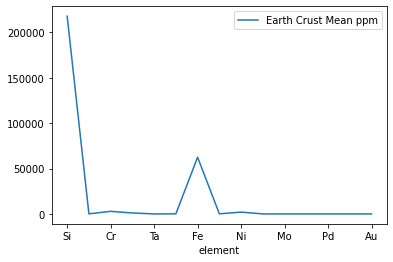

In [ ]:
composition.plot(y='Earth Crust Mean ppm', x='element')

### 3.2 Saving results

After performing a set of analysis it makes sense to save off your output. 

First to save the modified dataframe as an excel file use the command below. (you could save as a csv or many other formats instead)

**note** we created a variable ```results_path``` at the begining of the notebook. Since that is a string you just need to come up with a file name, and remember to add the '.xlsx' tail so that the command creates a mondern excel file.

#### 3.2.1 Example of saving a figure from pandas

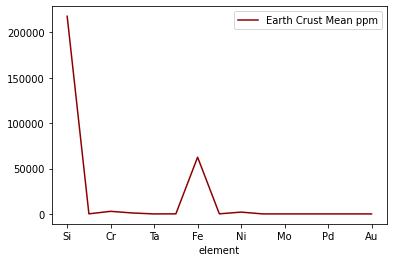

In [ ]:
fig = composition.plot(y='Earth Crust Mean ppm', x='element',color= 'DarkRed').get_figure()

fig.savefig(results_path+'element_abundace.png')

#### 3.2.2 Example of saving a dataframe

In [ ]:
composition

In [ ]:
composition.to_excel(results_path+'rescaled_earth_composition.xlsx', index=False)

Now to save the figure we need to do something a little different. When we are plotting with the pandas functions, we are actually working with the **matplotlib** libary to produce the plot. In order to save the file, we need to tell matplotlib to get the figure that pandas produced and then it handles the saving.  

## 4.0 Cutomising the plot

#### 4.1.1 Example of keyword plot specification.

first reload the data you have just saved.

In [ ]:
composition=pd.read_excel(results_path+'rescaled_earth_composition.xlsx')

quick reminder of what columns are present

In [ ]:
composition.columns

Index(['atomic number', 'element', 'D value', 'D value temp',
       'class of element', 'Earth Crust Mean', 'Earth Crust 1σ',
       'Measurement units', 'Solar System Mean (ppm)', 'Solar System  1σ',
       'Earth Crust Mean ppm'],
      dtype='object')

In [ ]:
composition

,atomic number,element,D value,D value temp,class of element,Earth Crust Mean,Earth Crust 1σ,Measurement units,Solar System Mean (ppm),Solar System 1σ,Earth Crust Mean ppm
0,14,Si,4.800000e-03,met/sil (1600°C),Liphophile,21.782000,259.199228,%,106500.0000,1250.0000,217820.000000
1,23,V,5.600000e-01,met/sil (1600°C),Liphophile,91.220000,0.396074,ppm,55.7000,1.3000,91.220000
2,24,Cr,3.500000e-01,met/sil (1600°C),Liphophile,2857.600000,0.321989,ppm,2590.0000,80.0000,2857.600000
3,25,Mn,2.000000e-02,met/sil (1600°C),Liphophile,1043.400000,3.544009,ppm,1910.0000,40.0000,1043.400000
4,73,Ta,9.700000e-04,met/sil (1600°C),Liphophile,36.650000,0.241247,ppb,0.0144,0.0001,0.036650
5,15,P,1.700000e+02,met/sil (1600°C),Moderately siderophile,77.125000,0.550000,ppm,920.0000,100.0000,77.125000
6,26,Fe,1.300000e+01,met/sil (1600°C),Moderately siderophile,6.250000,39.189795,%,182800.0000,1470.0000,62500.000000
7,27,Co,1.400000e+02,met/sil (1600°C),Moderately siderophile,104.200000,0.191964,ppm,502.0000,17.0000,104.200000
8,28,Ni,1.300000e+03,met/sil (1600°C),Moderately siderophile,0.199180,16.622180,%,10640.0000,210.0000,1991.800000
9,31,Ga,3.400000e+01,met/sil (1600°C),Moderately siderophile,3.675000,0.003000,ppm,9.5100,0.3100,3.675000


### 4.1 changing plot type

Pandas by defalut is showing a line plot. This data in particualr is **discrete** elements, so it should be plotted using a scatter plot or bar chart.  Lukily, pandas  supports this through use of **keywords**. These are the built in plots.

*   ‘bar’ or ‘barh’ for bar plots
*   ‘hist’ for histogram
*   ‘box’ for boxplot
*  ‘kde’ or ‘density’ for density plots
*  ‘area’ for area plots
*  ‘scatter’ for scatter plots
*  ‘hexbin’ for hexagonal bin plots
*  ‘pie’ for pie plots

You can access these in two way. First, by specifying the keywords inside  the (). Here is an example:




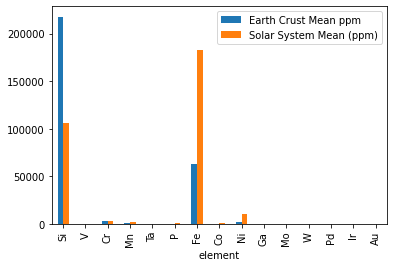

In [ ]:
composition.plot(y=['Earth Crust Mean ppm','Solar System Mean (ppm)'], x='element',kind='bar')

**note** you can add an extra column (in this case the solar system elemental abundance) with the commands above. not all chart types will accept this method for plotting multiple columns at once. This is to enforce good use of approriate plots for specific data types.  We will learn how to 'break' these rules later in the course.

#### 4.1.2 Example of use outside the bracket.

Pandas has also functionalised these plots so you can build them from the plot command like this:

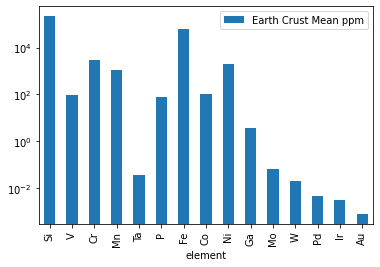

In [ ]:
composition.plot.bar(y='Earth Crust Mean ppm', x='element', logy=True)

**note** to make the data display better I have turned the y-axis into a logorithmic scale, since the lower concentration data is supressed otherwise.

#### 4.1.3 Action 
Explore the plot kind keywords to examine differnt types of plots. Add extra input lines as necessary to see which style shows the variation in the data the best. 

**note** not all types of chart will be compatable with the data set

### 4.2 selecting colors and plot markers

Here I have added in another specific command to modify how the figure labels the y-axis. Since you can see above it is labelling this with the last column title used. However, this data is not really 'CI Normalised' or even 'Normalised Silicate Earth'. Instead both actually represent the 'Elemental Depletion' as a result of the formation of the solar system. So we will use the ax1.set_ylabel() command to rename this axis.

Remember if using a string to name the axis, then you need to put the words in-between ''.

Further, since we are looking at very small deviations from 1, it is normal to plot these abundances up on a logarithmic scale. In both scatter plots add the parameter logy=True.

Other keywords that you should become familiar with would include:

color - this sets the single colour to be used for plotting the data selected. the default first colour to use is blue then the plot command will follow this colour cycle ( you can call these colours using a single letter):

b: blue

g: green

r: red

c: cyan

m: magenta

y: yellow

k: black

w: white

More on how colour can be called can be found here: https://het.as.utexas.edu/HET/Software/Matplotlib/api/colors_api.html

Further you can find a full list of named colours here: https://matplotlib.org/stable/gallery/color/named_colors.html

marker- sets what symbol you can use to mark each data point. a full list of symbols can be found here: https://matplotlib.org/stable/api/markers_api.html



label - set the name of the dataset (use this in the example  4.2.1)

alpha - sets the transparency of the data plotted. goes from 0 (transparent) to 1 (fully opaque)

c - allows to plot colours based on a set of categorical data

cmap - selects what colour map to use for the categorical data being plotted (note these two can not be used with the keyword 'color')

There are many many more keywords, but that is really beyond the scope of this lab.

#### 4.2.1 Example of changing color and marker shape

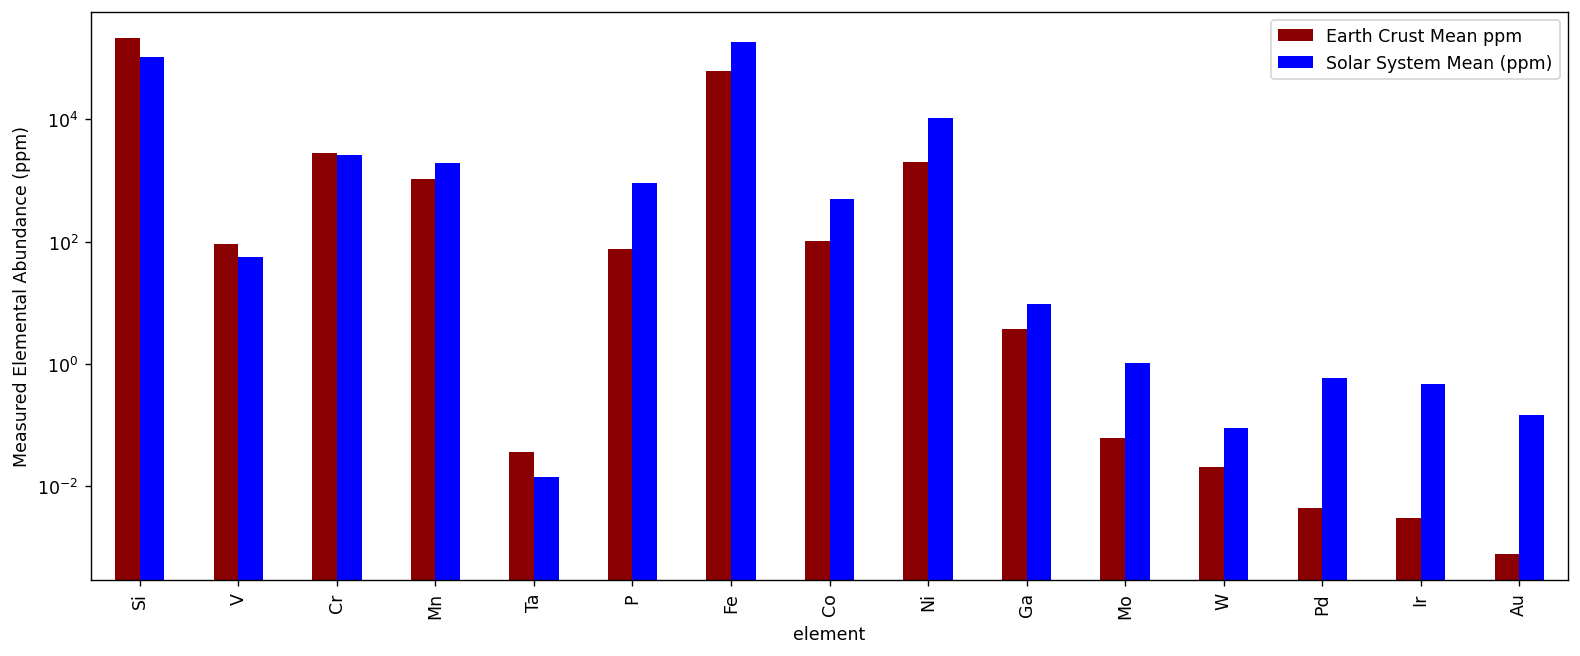

In [ ]:
composition.plot(kind='bar', y=['Earth Crust Mean ppm','Solar System Mean (ppm)'], x='element',logy=True,color=['DarkRed','Blue'],ylabel ='Measured Elemental Abundance (ppm)' )

**note** have also added the keywork 'ylabel' to produce a y-axis label

#### 4.2.2 Action - customise the color and marker shape

Now that you have selected the plot you prefer, use the keywords above to customise the plot. Add extra input cells as needed to compare figures side by side.

#### 4.2.3 Action Save revised figure

Save off the final figure using the commands from Example 3.2.2.

## 5.0 Box Plots and Summary Statistics



### 5.1 Box Plots

While you were exploring differnt plot types hopefully you decided to examine the box plot.

If not I will plot one of the data now.  I will discuss what these show for those of you that are unfamilar with them.

#### 5.1.1 Example box plot of crustal elemental abundance

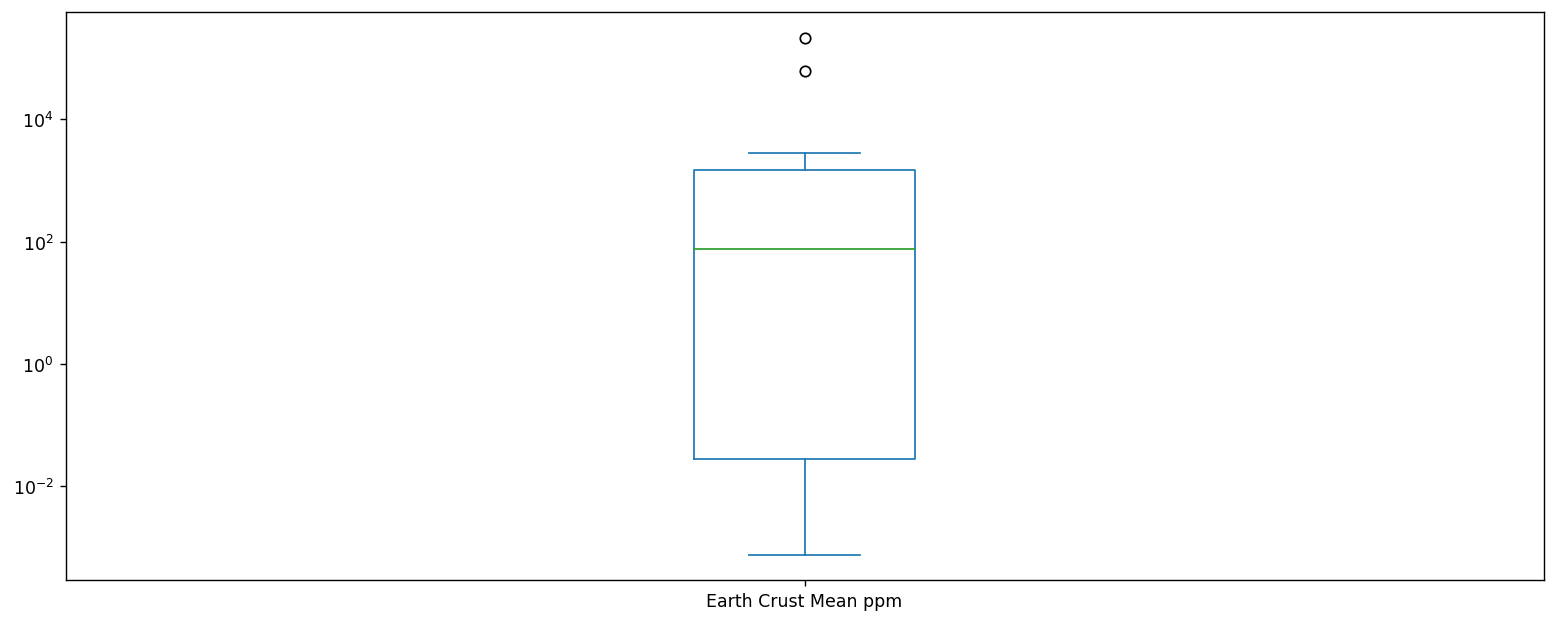

In [ ]:
composition.plot.box(y='Earth Crust Mean ppm', x='element', logy=True)

above you can observe that two of the data points are outliers, and by the shift of the mean (green line) they are pulling the population mean mean away from the true value.

### 5.2 Summary statistics

The box plot above show the distribution of elemental abundances. To do this a set of summary statistics needed to be computed 'under the hood' so to speak.  This begs a question: 

### 'How do I produce these statistics?'

### Answer:

Within pandas the function ```.describe()```will calculate all these automatically, either for the whole dataframe or each column as desired.

We will revist what each of these metrics mean in the coming weeks but for now, know that you can get them.

#### 5.2.1 Example of single column summary statistics

In [ ]:
composition[['Earth Crust Mean ppm']].describe()

,Earth Crust Mean ppm
count,15.000000
mean,19099.276487
std,57254.640445
min,0.000768
25%,0.028508
50%,77.125000
75%,1517.600000
max,217820.000000


**note** the out put summary statistics are now a new dataframe. (or series if only a single column) Thus you can assign them to a variable name and work with them like you would the orignal data.

#### 5.2.1 Action produce a box plot comparing  'Earth Crust Mean ppm' to 'Solar System Mean (ppm)'.

**Note** when slicing a dataframe if you want to call multiple columns at a time you would type 


```
dataframe[['column1','column2']]
```

This is a very pandas type of syntax, as other libaries use the [] differently.

#### 5.2.2 Action produce the summary statistics for each column.
**Hint** do you need to run the command from **example 5.2.1** twice?

### 5.2.3 Action save box plot and summary statistics dataframe